In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats
import numpy as np
import janitor
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_columns", 100)

## Influenza and family 

#### 3.1

At least one parent has influenza

#### 3.2

Both parents have influenza

#### 3.3

No, both children can have influenza at the same time

#### 3.4

At least one child has influenza

#### 3.5

First child has influenza

#### 3.6

C = A1 u A2

#### 3.7

D = B u C

#### 3.8 

Mother does not have influenza

#### 3.9

Father does not have influenza

#### 3.10

~C = ~A1 ^ ~A2

#### 3.11

~D = ~B ^ ~C

#### 3.12

In [3]:
pA1 = .1
pA2 = .1
pA1A2 = .02

In [4]:
# By definition of independence
pA1*pA2 == pA1A2

False

#### 3.13

In [5]:
pA3 = .2
pA4 = .2
pA3A4 = .1

In [6]:
pA3orA4 = pA3 + pA4 - pA3A4
pA3orA4

0.30000000000000004

#### 3.14

In [7]:
# Father has influenza givent mother has
pA1A2/pA2

0.19999999999999998

#### 3.15

In [8]:
pA2*(1-pA1)

0.09000000000000001

In [9]:
# Father has influenza givent mother has not
pNotA1 = 1 - pA1
pA2notA1 = pA2 - pA1A2
pA2notA1/pNotA1

0.08888888888888889

## Mental health

In [10]:
p77men = 4.9/100
p76woman = 2.3/100
p82woman = 7.8/100

#### 3.16

In [11]:
pAll = p77men*p76woman*p82woman
pAll

8.7906e-05

#### 3.17

In [12]:
pNoWoman = (1-p76woman)*(1-p82woman)
pAtLeastOneWoman = 1-pNoWoman
pAtLeastOneWoman

0.09920600000000002

In [13]:
# this is the same as
p76woman + p82woman - p82woman*p76woman

0.099206

#### 3.18

In [14]:
pNoone = (1-p76woman)*(1-p82woman)*(1-p77men)
pAtLeastOne = 1-pNoone
pAtLeastOne

0.14334490600000005

#### 3.19

In [15]:
pExtactlyOne = p77men*(1-p76woman)*(1-p82woman) + (1-p77men)*(p76woman)*(1-p82woman) + (1-p77men)*(1-p76woman)*(p82woman)
pExtactlyOne

0.136777718

#### 3.20

In [16]:
pExtactlyOneWoman = (1-p77men)*(p76woman)*(1-p82woman) + (1-p77men)*(1-p76woman)*(p82woman)
pWomanGivenDisease = pExtactlyOneWoman/pExtactlyOne
pWomanGivenDisease

0.6772946160718956

#### 3.21

In [17]:
pExactlyTwo = p77men*p76woman*(1-p82woman) + (p77men)*(1-p76woman)*(p82woman) + (1-p77men)*(p76woman)*(p82woman)
pExactlyTwoWoman = (1-p77men)*(p76woman)*(p82woman)
p2WomanGivenDisease = pExactlyTwoWoman/pExactlyTwo
p2WomanGivenDisease

0.26331528709508245

#### 3.22

In [18]:
pExactlyTwo = p77men*p76woman*(1-p82woman) + (p77men)*(1-p76woman)*(p82woman) + (1-p77men)*(p76woman)*(p82woman)
pExactlyTwoYounger80 = (p77men)*(p76woman)*(1-p82woman)
pYounger80GivenDisease = pExactlyTwoYounger80/pExactlyTwo
pYounger80GivenDisease

0.16037178193509713

#### 3.23

In [19]:
pMarriedCouple = 0.0015
pMan7579 = 4.9/100
pWoman7579 = 2.3/100
pMenGivenWoman = pMarriedCouple/pWoman7579
pMenGivenWoman

0.06521739130434782

It is bigger then unconditional probability as we have more information.

#### 3.24

In [20]:
pMarriedCouple = 0.0015
pMan7579 = 4.9/100
pWoman7579 = 2.3/100
pWomenGivenMan = pMarriedCouple/pMan7579
pWomenGivenMan

0.030612244897959183

It is bigger then unconditional probability as we have more information.

#### 3.25

In [21]:
pBothCouple = pMan7579 + pWoman7579 - pMarriedCouple
pBothCouple

0.07050000000000001

#### 3.26

In [22]:
prevalence = 5*1.6 + 10*0 + 9*0 + 17*2.2 + 11*4.9 + 18*2.3 + 8*8.6 + 12*7.8 + 4*35 + 6*27.9
prevalence /= 100*100
prevalence

0.06105

#### 3.27

In [23]:
int(prevalence*1000)

61

## Infectious Disease

In [24]:
pChild34_qiv = 3.78/100
pChild34_con = 5.69/100
pChild58_qiv = 1.7/100
pChild58_con = 5.15/100

#### 3.28

In [25]:
pNoChild = 1-(1-pChild34_qiv)*(1-pChild58_qiv)*(1-pChild58_qiv)
pNoChild

0.07023672420000004

#### 3.29

In [26]:
p34vac = .8
p58vac = .7
pChild34_nv = 2*pChild34_con
pChild58_nv = 2*pChild58_con

In [27]:
p34_influenza = p34vac*pChild34_qiv + (1-p34vac)*pChild34_nv
p34_influenza

0.053000000000000005

#### 3.30

In [28]:
p58_influenza = p58vac*pChild58_qiv + (1-p58vac)*pChild58_nv
p58_influenza

0.042800000000000005

#### 3.31

In [29]:
p58vac*pChild58_qiv/p58_influenza

0.2780373831775701

## Genetics

### Dominant mode of inheritance

In [30]:
pChildDisease = 0.5

#### 3.32

In [31]:
pDominantBoth = pChildDisease**2
pDominantBoth

0.25

#### 3.33

In [32]:
# pDominaneOnlyOne = (pChildDisease)*(1-pChildDisease) + (1-pChildDisease)*(pChildDisease)
pDominaneOnlyOne = 2*(1-pChildDisease)*(pChildDisease)
pDominaneOnlyOne

0.5

#### 3.34

In [33]:
pDominantNeither = (1-pChildDisease)**2
pDominantNeither

0.25

#### 3.35

In [34]:
0.5

0.5

#### 3.36

yes

### Autosoma recessive mode of inheritance

In [35]:
pChildDisease = 0.25

#### 3.37 

In [36]:
pRecessiveBoth = pChildDisease**2
pRecessiveBoth

0.0625

#### 3.38

In [37]:
pRecessiveOnlyOne = 2*(1-pChildDisease)*(pChildDisease)
pRecessiveOnlyOne

0.375

#### 3.39

In [38]:
pRecessiveNeither = (1-pChildDisease)**2
pRecessiveNeither

0.5625

### Sex-linked mode of inheritance

In [39]:
pMaleDisease = 0.5
pFemaleDisease = 0

In [40]:
pMale = 0.5
pFemale = 0.5

#### 3.40

In [41]:
pSexLinkBothMF = pMaleDisease*pFemaleDisease
pSexLinkBothMF

0.0

#### 3.41

In [42]:
pSexLinkOneMF = pFemaleDisease*(1-pMaleDisease) + (1-pFemaleDisease)*(pMaleDisease)
pSexLinkOneMF

0.5

#### 3.42

In [43]:
pSexLinkNeitherMF = (1-pFemaleDisease)*(1-pMaleDisease)
pSexLinkNeitherMF

0.5

#### 3.43

In [44]:
pMale = 1
pFemale = 0

In [45]:
pSexLinkBothMM = pMaleDisease**2
pSexLinkBothMM

0.25

#### 3.44

In [46]:
pSexLinkOnlyOneMM = 2*pMaleDisease*(1-pMaleDisease)
pSexLinkOnlyOneMM

0.5

#### 3.45

In [47]:
pSexLinkNeitherMM = (1-pMaleDisease)**2
pSexLinkNeitherMM

0.25

#### 3.46

Both affected, two children

In [48]:
pBothTotal = pDominantBoth + pRecessiveBoth + pSexLinkBothMF
pPosteriorDominant = pDominantBoth/pBothTotal
pPosteriorRecessive = pRecessiveBoth/pBothTotal
pPosteriorSexLink = pSexLinkBothMF/pBothTotal
pPosteriorDominant, pPosteriorRecessive, pPosteriorSexLink

(0.8, 0.2, 0.0)

#### 3.47

One affected, two males

In [49]:
pOneTotal = pDominaneOnlyOne + pRecessiveOnlyOne + pSexLinkOnlyOneMM
pPosteriorDominant = pDominaneOnlyOne/pOneTotal
pPosteriorRecessive = pRecessiveOnlyOne/pOneTotal
pPosteriorSexLink = pSexLinkOnlyOneMM/pOneTotal
pPosteriorDominant, pPosteriorRecessive, pPosteriorSexLink

(0.36363636363636365, 0.2727272727272727, 0.36363636363636365)

#### 3.48

Isn't it the same as 3.46?

#### 3.49

##  Obstetrics

In [50]:
pGestation28 = 0.007
pGestation2831 = 0.012
pGestation3235 = 0.05
pGestation36 = 0.037
pGestation37 = 0.893

In [51]:
pLowBirth28 = 0.949
pLowBirth2831 = 0.702
pLowBirth3235 = 0.434
pLowBirth36 = 0.201
pLowBirth37 = 0.029

####  3.50

In [52]:
pLowBirth = pLowBirth28*pGestation28 \
    + pLowBirth2831*pGestation2831 \
    + pLowBirth3235*pGestation3235 \
    + pLowBirth36*pGestation36 \
    + pLowBirth37*pGestation37
pLowBirth

0.070101

#### 3.51

Events are independent when $p(A)p(B)=p(A\land B)$

Here: A - gestation less or equal 31 weeks and B - low birthweight

In [53]:
pGestataionLessEq31 = pGestation28+pGestation2831
pGestationLessEq31AndLowBirth = pLowBirth28*pGestation28 + pLowBirth2831+pGestation2831

In [54]:
pGestataionLessEq31*pLowBirth == pGestationLessEq31AndLowBirth

False

####  3.52

Calculate negative event (gestation>36 given low birth)

In [55]:
pGestation37GivenLB = pLowBirth37*pGestation37/pLowBirth
pGestationLessEq36givenLB = 1-pGestation37GivenLB
pGestationLessEq36givenLB

0.6305758833682829

##  Pulmonary Disease

#### 3.53

In [56]:
pMotherSmoker = .5
pFatherSmoker = .4

pBothSmokers= pMotherSmoker*pFatherSmoker
pBothSmokers

0.2

#### 3.54

Events are independent so pFatherGivenMother = pFather

In [57]:
pFatherGivenMother = pFatherSmoker
pFatherGivenMother

0.4

In [58]:
pMotherIfFather = .6
pMotherIfNotFather = .2

#### 3.55 

In [59]:
pFather = .5
pFatherAndNotMother = 1-pMotherIfFather
pFatherAndNotMother = pFather * pFatherAndNotMother
pFatherAndNotMother

0.2

#### 3.56

If events are independent $p(F) = p(F|M) = p(F|M-)$

In [60]:
pFather == pFatherAndNotMother

False

#### 3.57

In [61]:
pBothSmokers

0.2

In [62]:
pOffspringGivenMotherFather = .15
pOffspringGivenMotherNotFather = .13
pOffspringGivenNotMotherFather = .05
pOffspringGivenNotMotherNotFather = .04

pMotherNotFather = (1-pFather)*pMotherIfNotFather
pNotMotherNotFather = (1-pFather)*(1-pMotherIfNotFather)
pMotherFather = pFather*pMotherIfFather
pNotMotherFather = pFather*(1-pMotherIfFather)

pOffspring = pOffspringGivenMotherFather*pMotherFather + \
        pOffspringGivenMotherNotFather*pMotherNotFather + \
        pOffspringGivenNotMotherFather*pNotMotherFather + \
        pOffspringGivenNotMotherNotFather*pNotMotherNotFather

pOffspring

0.084

#### 3.58

In [63]:
pFatherIfOffspring = (pOffspringGivenMotherFather*pMotherFather+pOffspringGivenNotMotherFather*pNotMotherFather)/pOffspring
pFatherIfOffspring

0.6547619047619048

#### 3.59 

In [64]:
pMotherIfOffspring = (pOffspringGivenMotherFather*pMotherFather+pOffspringGivenMotherNotFather*pMotherNotFather)/pOffspring
pMotherIfOffspring

0.6904761904761904

#### 3.60 

In [65]:
pNotOffspringGivenMotherFather = 1 - pOffspringGivenMotherFather
pNotOffspringGivenMotherNotFather = 1-pOffspringGivenMotherNotFather
pNotOffspringGivenNotMotherFather = 1-pOffspringGivenNotMotherFather
pNotOffspringGivenNotMotherNotFather = 1-pOffspringGivenNotMotherNotFather

pNotOffspring = pNotOffspringGivenMotherFather*pMotherFather + \
        pNotOffspringGivenMotherNotFather*pMotherNotFather + \
        pNotOffspringGivenNotMotherFather*pNotMotherFather + \
        pNotOffspringGivenNotMotherNotFather*pNotMotherNotFather

pNotOffspring

0.916

In [66]:
pFatherIfNotOffspring = (pNotOffspringGivenMotherFather*pMotherFather + pNotOffspringGivenNotMotherFather*pNotMotherFather)/pNotOffspring
pFatherIfNotOffspring

0.48580786026200873

#### 3.61

In [67]:
pMotherIfNotOffspring = (pNotOffspringGivenMotherFather*pMotherFather + pNotOffspringGivenMotherNotFather*pMotherNotFather)/pNotOffspring
pMotherIfNotOffspring

0.3733624454148472

#### 3.62

In [68]:
pFatherIfOffspring == pFatherIfNotOffspring

False

#### 3.63

In [69]:
pMotherIfOffspring == pMotherIfNotOffspring

False

## Genetics, Obstetrics

In [70]:
nPositiveSmoking = 89
nNegativeSmoking = 2
nPositiveNonSmoking = 7
nNegativeNonSmoking = 330

#### 3.64

The **sensitivity** of a symptom (or set of symptoms or screening test) is the probability
that the symptom is present given that the person has a disease.

In [71]:
sensitivity = nPositiveSmoking / (nPositiveSmoking+nNegativeSmoking)
sensitivity

0.978021978021978

#### 3.65

The **specificity** of a symptom (or set of symptoms or screening test) is the probability
that the symptom is not present given that the person does not have a disease.

In [72]:
specificity = nNegativeNonSmoking / (nNegativeNonSmoking+nPositiveNonSmoking)
specificity

0.9792284866468842

#### 3.66

In [73]:
pMotherSmoker = 0.2
pMotherNonSmoker = 1-pMotherSmoker

In [74]:
PVp = sensitivity*pMotherSmoker / (sensitivity*pMotherSmoker + (1-specificity)*pMotherNonSmoker)
PVp

0.9216987800006144

#### 3.67

Predictive Value Positive

## Pulmonary Disease

In [75]:
scn_df = pd.DataFrame(
    {
        'n_students': [1163 , 70, 30, 27, 19, 23],
        'per_scn': [3.3, 4.3, 6.7, 29.6, 36.8, 65.2],
        'group': ['no_smoker', 'light', 'light', 'moderate', 'moderate', 'heavy']
    },
    index = ['None', '1-4', '5-14', '15-24', '25-44', '45+'],
)
scn_df['n_smokers'] = scn_df.n_students * scn_df.per_scn/100
scn_df['n_nosmokers'] = scn_df.n_students - scn_df.n_smokers

In [76]:
scn_df['group'] = scn_df['group'].astype('category').cat.reorder_categories(['no_smoker', 'light', 'moderate', 'heavy'])

In [77]:
scn_df

,n_students,per_scn,group,n_smokers,n_nosmokers
None,1163,3.3,no_smoker,38.379,1124.621
1-4,70,4.3,light,3.010,66.990
5-14,30,6.7,light,2.010,27.990
15-24,27,29.6,moderate,7.992,19.008
25-44,19,36.8,moderate,6.992,12.008
45+,23,65.2,heavy,14.996,8.004


#### 3.68-3.70

In [78]:
def sens(part_df):
    return part_df.n_smokers.sum() / part_df.n_students.sum()

In [79]:
scn_df.groupby('group').apply(sens)

group
no_smoker    0.033000
light        0.050200
moderate     0.325739
heavy        0.652000
dtype: float64

#### 3.71

In [80]:
specificity = scn_df.loc['None', 'n_nosmokers'] / scn_df.loc['None', 'n_students']
specificity

0.9670000000000001

#### 3.72

In [81]:
table = scn_df.groupby(scn_df.index != 'None').apply(sum)
table

,n_students,per_scn,n_smokers,n_nosmokers
False,1163.0,3.3,38.379,1124.621
True,169.0,142.6,35.000,134.000


In [82]:
TP = table.loc[True, 'n_smokers']
FP = table.loc[False, 'n_smokers']
FN = table.loc[True, 'n_nosmokers']
TN = table.loc[False, 'n_nosmokers']

In [83]:
sens = TP / (TP+FN)
spec = TN / (FP+TN)
sens, spec

(0.20710059171597636, 0.9670000000000001)

In [84]:
ppv = TP / (TP+FP)
ppv

0.4769757014949782

#### 3.73

In [85]:
ppn = TN / (TN+FN)
ppn

0.8935342728271656

#### 3.74

In [86]:
scn_df2 = scn_df.copy()
scn_df2.loc['1-4', 'n_students'] += scn_df2.loc['None', 'n_students']*.2
scn_df2.loc['5-14', 'n_students'] += scn_df2.loc['None', 'n_students']*.1
scn_df2.loc['None', 'n_students'] *= .7

scn_df2['n_smokers'] = scn_df2.n_students * scn_df2.per_scn/100
scn_df2['n_nosmokers'] = scn_df2.n_students - scn_df2.n_smokers

In [87]:
scn_df2

,n_students,per_scn,group,n_smokers,n_nosmokers
None,814.1,3.3,no_smoker,26.8653,787.2347
1-4,302.6,4.3,light,13.0118,289.5882
5-14,146.3,6.7,light,9.8021,136.4979
15-24,27.0,29.6,moderate,7.9920,19.0080
25-44,19.0,36.8,moderate,6.9920,12.0080
45+,23.0,65.2,heavy,14.9960,8.0040


In [88]:
table

,n_students,per_scn,n_smokers,n_nosmokers
False,1163.0,3.3,38.379,1124.621
True,169.0,142.6,35.000,134.000


In [89]:
table2 = scn_df2.groupby(scn_df2.index != 'None').apply(sum)
table2

,n_students,per_scn,n_smokers,n_nosmokers
False,814.1,3.3,26.8653,787.2347
True,517.9,142.6,52.7939,465.1061


In [90]:
TP2 = table2.loc[True, 'n_smokers']
FP2 = table2.loc[False, 'n_smokers']
FN2 = table2.loc[True, 'n_nosmokers']
TN2 = table2.loc[False, 'n_nosmokers']

In [91]:
TP, FP, FN, TN

(35.0, 38.379, 133.99999999999997, 1124.621)

In [92]:
TP2, FP2, FN2, TN2

(52.79390000000001, 26.865299999999998, 465.1061, 787.2346999999999)

In [93]:
sens2 = TP2 / (TP2+FN2)
spec2 = TN2 / (FP2+TN2)
sens2, spec2

(0.10193840509750916, 0.967)

#### 3.75

In [94]:
ppv2 = TP2 / (TP2+FP2)
ppv2

0.662747052443409

In [95]:
ppn2 = TN2 / (TN2+FN2)
ppn2

0.6286105986485467

In [96]:
scn_df

,n_students,per_scn,group,n_smokers,n_nosmokers
None,1163,3.3,no_smoker,38.379,1124.621
1-4,70,4.3,light,3.010,66.990
5-14,30,6.7,light,2.010,27.990
15-24,27,29.6,moderate,7.992,19.008
25-44,19,36.8,moderate,6.992,12.008
45+,23,65.2,heavy,14.996,8.004


In [97]:
scn_df2

,n_students,per_scn,group,n_smokers,n_nosmokers
None,814.1,3.3,no_smoker,26.8653,787.2347
1-4,302.6,4.3,light,13.0118,289.5882
5-14,146.3,6.7,light,9.8021,136.4979
15-24,27.0,29.6,moderate,7.9920,19.0080
25-44,19.0,36.8,moderate,6.9920,12.0080
45+,23.0,65.2,heavy,14.9960,8.0040


## Hypertension

In [98]:
TP = 6
FP = 15
FN = 7
TN = 51

#### 3.76

In [99]:
sens = TP / (TP+FN)
sens

0.46153846153846156

#### 3.77

In [100]:
spec = TN / (FP+TN)
spec

0.7727272727272727

#### 3.78

In [101]:
ppv = TP / (TP+FP)
ppn = TN / (TN+FN)
ppv, ppn

(0.2857142857142857, 0.8793103448275862)

### Otolaryngology

In [102]:
oto_df = pd.read_csv('data/EAR.DAT.txt').clean_names().set_index('id')

In [103]:
oto_df

,clear,antibo,age,ear
id,,,,
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,0,1,1,1
5,0,1,1,1
...,...,...,...,...
201,1,2,3,2
202,1,2,3,1
202,1,2,3,2


#### 3.79

In [104]:
a = oto_df.groupby(['antibo', 'clear']).size()

TODO

### Genecology 

In [105]:
pPositiveGivenPreg = 0.95
pNegativeGivenNotPreg = 0.99

In [106]:
pNegativeGivenPreg = 1 - pPositiveGivenPreg
pPositiveGivenNotPreg = 1 - pNegativeGivenNotPreg

#### 3.83

In [107]:
sensitivity = pPositiveGivenPreg

#### 3.84

In [108]:
specificity = pNegativeGivenNotPreg

#### 3.85

In [109]:
pActualPregnant = .1

In [110]:
ppv = pPositiveGivenPreg * pActualPregnant / (pActualPregnant*pPositiveGivenPreg + pPositiveGivenNotPreg*(1-pActualPregnant))
ppv

0.9134615384615384

#### 3.86

In [111]:
newTestCost = 2*pActualPregnant*(1-sensitivity) + (1-pActualPregnant)*(1-specificity)
newTestCost

0.019000000000000017

In [112]:
oldSpecificity = 0.98
oldSpecificity = 0.98
oldTestCost = 2*pActualPregnant*(1-oldSpecificity) + (1-pActualPregnant)*(1-oldSpecificity)
oldTestCost

0.02200000000000002

In [113]:
(oldTestCost-newTestCost)/oldTestCost

0.13636363636363635

New test is better by 13.64%

### Mental health

#### 3.87 

In [114]:
df = pd.DataFrame({'CMMS':[5, 10, 15, 20, 25, 30], 'nondemand':[0, 0, 3, 9, 16, 18], 'demand':[2, 1, 4, 5, 3, 1]})

In [115]:
df

,CMMS,nondemand,demand
0,5,0,2
1,10,0,1
2,15,3,4
3,20,9,5
4,25,16,3
5,30,18,1


In [116]:
def stats_by_thr(df, thr):
    df_grp = df.groupby(df.CMMS <= thr).sum()
    sens = df_grp.demand.get(True, 0)/ df_grp.demand.sum()
    spec = df_grp.nondemand.get(False, 0)/ df_grp.nondemand.sum()
    return sens, spec

#### 3.87 & 3.88

In [117]:
sens20, spec20 = stats_by_thr(df, 20)
sens20, spec20

(0.75, 0.7391304347826086)

#### 3.89

In [118]:
data = dict()
for t in [5, 10, 15, 20, 25, 30]:
    data[t] = stats_by_thr(df, t)

In [119]:
roc_df = pd.DataFrame.from_dict(data, orient='index', columns=['sens', 'spec'])

In [120]:
roc_df

,sens,spec
5,0.1250,1.000000
10,0.1875,1.000000
15,0.4375,0.934783
20,0.7500,0.739130
25,0.9375,0.391304
30,1.0000,0.000000


In [121]:
roc_df['1-spec'] = 1-roc_df.spec

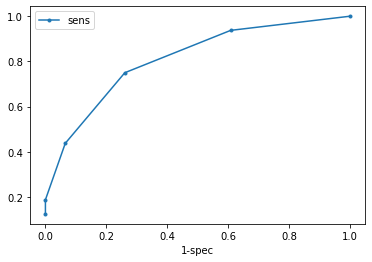

In [122]:
ax = roc_df.plot(x='1-spec', y='sens', style='.-')

#### 3.90

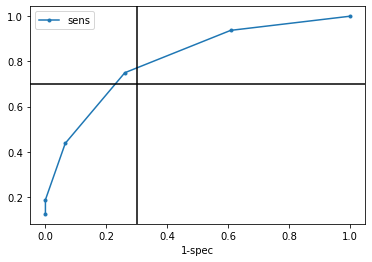

In [123]:
ax = roc_df.plot(x='1-spec', y='sens', style='.-')
ax.axhline(.7, c='black')
ax.axvline(1-.7, c='black')

#### 3.91


Only threshold with sensitivity and specificity > 70% is 20.

#### 3.92

In [124]:
np.trapz(roc_df.sens, roc_df['1-spec'])

0.8091032608695652

### Demography

#### 3.93

In [125]:
p2L_1D = 5556/5924
p2L_1D

0.937879810938555

#### 3.94

In [126]:
p2L_1L = 262513/265701
p2L_1L

0.9880015506151651

#### 3.95

In [127]:
p0_1D = 1-5924/7022
p0_1D

0.15636570777556247

In [128]:
p1_1D = 5924/7022
p1_1D

0.8436342922244375

In [129]:
p2_1D = (277+3916)/7022
p2_1D

0.5971233266875534

#### 3.96

In [130]:
p0_1L = 1-265701/350693
p0_1L

0.24235442395485507

In [131]:
p1_1D = 265701/350693
p1_1D

0.7576455760451449

In [132]:
p2_1D = (2444+79450)/350693
p2_1D

0.23352048657942986

### Mental Health

#### 3.97 

In [133]:
sensitivity = 1643 / ( 1643 + 127)
sensitivity

0.9282485875706215

#### 3.98

In [134]:
specificity = 228 / (228 + 190)
specificity

0.5454545454545454

#### 3.99

In [135]:
sensitivity2 = (1076) / (1076+567+127)
sensitivity2

0.607909604519774

In [136]:
1076+567+127, 1643 + 127

(1770, 1770)

#### 3.100

In [137]:
specificity2 = (124+228) / (228 + 128+66)
specificity2

0.8341232227488151

#### Cardiovascular disease

#### 3.101 

Incidence

#### 3.102 

#### 3.103

### Genetics 

In [138]:
pComplete = 0.5
pHalf = 0.25

#### 3.104

In [139]:
pComplete**2

0.25

#### 3.105

In [140]:
pHalf**2

0.0625

#### 3.106

In [141]:
pPosterior = pComplete**2/(pComplete**2 + pHalf**2)
pPosterior

0.8

#### 3.107

In [142]:
pPosterior * pComplete + (1-pPosterior)*pHalf

0.45

### Simulation - Infectious Disease

In [143]:
from scipy.stats import bernoulli

#### 3.108

In [144]:
def calc_stat_power(p_ind_pat, n_patients=100, n_samples=20, sig_better=88):
    sim_data = bernoulli.rvs(p_ind_pat, size=(n_patients, n_samples))
    sample = np.sum(sim_data, axis=0)
    return sum(sample >= sig_better)/n_samples

In [145]:
calc_stat_power(.85)

0.1

#### 3.109

In [146]:
calc_stat_power(.8)

0.0

In [147]:
calc_stat_power(.9)

0.85

In [148]:
calc_stat_power(.95)

1.0

#### 3.110

<AxesSubplot:>

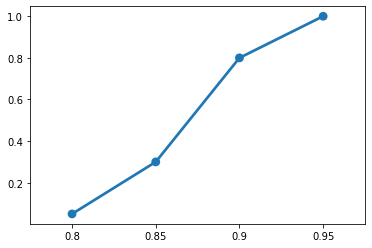

In [149]:
eff = [0.8, 0.85, 0.9, 0.95]
sp = [calc_stat_power(e) for e in eff]
sns.pointplot(x=eff, y=sp)

### Infectious Disease, Cardiovascular Disease

In [150]:
TP = 80
TN = 10
FP = 20
FN = 90

####  3.111

In [151]:
PVp = TP/(TP+FP)
PVp

0.8

#### 3.112

In [152]:
PVn = TN/(TN+FN)
PVn

0.1

#### 3.113

In [153]:
sens = TP/(TP+FN)
sens

0.47058823529411764

#### 3.114

In [154]:
spec = TN/(TN+FP)
spec

0.3333333333333333

### Genetics

#### 3.115

In [155]:
pMother = 0.25
pFather = 0.25
pChild = pMother*pFather
pChild

0.0625

#### 3.116

In [156]:
prevalenceA = 0.4
prevalenceB = 0.1
pPopulationA = 0.3
pPopulationB = 0.7

In [157]:
pAA = .25
pBB = .65
pAB = .1

In [158]:
pChild = pAA*prevalenceA**2 + pBB*prevalenceB**2 + pAB*prevalenceA*prevalenceB
pChild

0.05050000000000001

#### 3.117

In [159]:
pBothAA = pAA*prevalenceA**2 / pChild
pBothAA

0.7920792079207921

In [160]:
pBothBB = pBB*prevalenceB**2 / pChild
pBothBB

0.12871287128712872

In [161]:
pMixedAB = pAB*prevalenceA*prevalenceB / pChild
pMixedAB

0.07920792079207921

### Orthopedics

In [162]:
df = pd.DataFrame({'VAS':[2, 4, 6, 10], 'FAIR>=2':[5, 3, 7, 7], 'FAIR<2':[14, 12, 6, 6]})

In [163]:
df

,VAS,FAIR>=2,FAIR<2
0,2,5,14
1,4,3,12
2,6,7,6
3,10,7,6


In [164]:
def stats_by_thr(df, thr):
    df_grp = df.groupby(df.VAS <= thr).sum()
    sens = df_grp['FAIR>=2'].get(False, 0) / df_grp['FAIR>=2'].sum()
    spec = df_grp['FAIR<2'].get(True, 0) / df_grp['FAIR<2'].sum()
    return sens, spec

#### 3.118

In [165]:
sens, spec = stats_by_thr(df, 4)

In [166]:
sens

0.6363636363636364

#### 3.119

In [167]:
spec

0.6842105263157895

#### 3.120

In [168]:
data = dict()
for t in [0, 3, 5, 7, 11]:
    data[t] = stats_by_thr(df, t)

In [169]:
roc_df = pd.DataFrame.from_dict(data, orient='index', columns=['sens', 'spec'])
roc_df['1-spec'] = 1-roc_df.spec
roc_df

,sens,spec,1-spec
0,1.000000,0.000000,1.000000
3,0.772727,0.368421,0.631579
5,0.636364,0.684211,0.315789
7,0.318182,0.842105,0.157895
11,0.000000,1.000000,0.000000


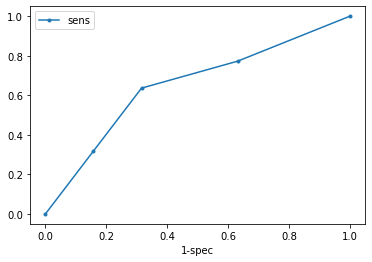

In [170]:
ax = roc_df.plot(x='1-spec', y='sens', style='.-')

#### 3.121

### Cancer

In [171]:
df = pd.DataFrame({'estradiol':[4, 9, 14, 19, 24, 29, 30], 'cases':[28, 96, 53, 17, 10, 3, 6], 'controls':[72, 233, 86, 26, 6, 5, 4]})

In [172]:
df_grp = df.groupby(df.estradiol >= 20).sum()
df_grp

,estradiol,cases,controls
estradiol,,,
False,46,194,417
True,83,19,15


In [173]:
def stats_by_thr(df, thr):
    df_grp = df.groupby(df.estradiol >= thr).sum()
    sens = df_grp['cases'].get(True, 0) / df_grp['cases'].sum()
    spec = df_grp['controls'].get(False, 0) / df_grp['controls'].sum()
    return sens, spec

#### 3.122

In [174]:
sens, spec = stats_by_thr(df, 19.9)

In [175]:
sens

0.0892018779342723

#### 3.123

In [176]:
spec

0.9652777777777778

#### 3.124

In [177]:
prevalence = 0.02

### Cardiovascular Disease

In [178]:
deathsMenOutOfHosp1998 = 280
deathsMenInHosp1998 = 120
deathsWomenOutOfHosp1998 = 100
deathsWomenInHosp1998 = 40

In [179]:
overall1998 = deathsMenOutOfHosp1998 + deathsMenInHosp1998 + deathsWomenOutOfHosp1998 + deathsWomenInHosp1998
overall1998

540

#### 3.125

In [180]:
pMale = 0.5
pFemale = 1-pMale
mortality = pMale*(deathsMenOutOfHosp1998+deathsMenInHosp1998) + pFemale*(deathsWomenInHosp1998+deathsWomenOutOfHosp1998)
mortality

270.0

#### 3.126

In [181]:
yearsTo2015 = 2015-1998
inHospDecline = 5.3/100
outHospDecline = 1.8/100

In [182]:
deathsMenOutOfHosp2015 = deathsMenOutOfHosp1998 *(1-outHospDecline)**yearsTo2015
deathsWomenOutOfHosp2015 = deathsWomenOutOfHosp1998 *(1-outHospDecline)**yearsTo2015
deathsMenInHosp2015 = deathsMenInHosp1998 *(1-inHospDecline)**yearsTo2015
deathsWomenInHosp2015 = deathsWomenInHosp1998 *(1-inHospDecline)**yearsTo2015
deathsMenOutOfHosp2015, deathsMenInHosp2015, deathsWomenOutOfHosp2015, deathsWomenInHosp2015

(205.61430386705226, 47.54785056308381, 73.43367995251866, 15.849283521027937)

In [183]:
overal2015 = deathsMenOutOfHosp2015 + deathsMenInHosp2015 + deathsWomenOutOfHosp2015 + deathsWomenInHosp2015
overal2015

342.44511790368267

#### 3.127

In [184]:
(deathsWomenOutOfHosp2015 + deathsWomenInHosp2015) / overal2015

0.26072196333270153

#### Cancer

#### 3.128

In [185]:
cancer_df = pd.DataFrame({
    'age':['50-54', '55-59', '60-64', '65-69', '70-74'], 
    'incidence2000': [360, 422, 479, 534, 600],
    'incidence2006': [314, 412, 510, 544, 558],
    'proportions': [.22, .21, .20, .19, .18]})
cancer_df.set_index('age', inplace=True)
cancer_df

,incidence2000,incidence2006,proportions
age,,,
50-54,360,314,0.22
55-59,422,412,0.21
60-64,479,510,0.20
65-69,534,544,0.19
70-74,600,558,0.18


In [186]:
overall2000 = (cancer_df['incidence2000'] * cancer_df['proportions']).sum()
overall2000

473.08000000000004

#### 3.129

In [187]:
overall2006 = (cancer_df['incidence2006'] * cancer_df['proportions']).sum()
overall2006

461.40000000000003

#### 3.130

In [188]:
(overall2006-overall2000)/overall2000*100

-2.468927031368903

#### 3.131

In [189]:
pCancer = cancer_df.loc['55-59', 'incidence2000']/1e5
pCancer

0.00422

In [190]:
pNoWowman = scipy.stats.binom.pmf(0, 100, pCancer)
pNoWowman

0.655148774168285

In [191]:
pOneWoman = scipy.stats.binom.pmf(1, 100, pCancer)
pOneWoman

0.27764444224528606

In [192]:
pLessThenTwo = pNoWowman + pOneWoman
pTwoOrMore = 1 - pLessThenTwo
pTwoOrMore

0.06720678358642895

### Radiology

#### 3.132

In [193]:
TP = 38
TN = 200
FN = 1
FP = 1

In [194]:
sens = TP / (TP+FN)
sens

0.9743589743589743

#### 3.133

In [195]:
spec = TN / (TN+FP)
spec

0.9950248756218906

#### 3.134

In [196]:
pvp = TP / (TP+FP)
pvp

0.9743589743589743

#### 3.135

Predictive value positive

### Cardiovascular Disease

In [197]:
TP = 20
TN = 318
FN = 13
FP = 95

#### 3.136

In [198]:
sens = TP / (TP+FN)
sens

0.6060606060606061

#### 3.137

In [199]:
spec = TN / (TN+FP)
spec

0.7699757869249395

#### 3.138

In [200]:
pvp = TP/(TP+FP)
pvp

0.17391304347826086

#### 3.139

In [201]:
pvn = TN/(TN+FN)
pvn

0.9607250755287009

#### 3.140

the same?

### Obstetrics, Health Promotion

In [202]:
TP = 6685
TN = 23227
FN = 1222
FP = 1126

#### 3.141

In [203]:
pvp = TP/(TP+FP)
pvp

0.8558443221098451

#### 3.142

In [204]:
pvn = TN/(TN+FN)
pvn

0.9500184056607632

#### 3.143

In [205]:
pvp*0.97

0.8301689924465497

#### 3.144

In [206]:
pvn*(1-0.05)

0.902517485377725